In [204]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
import pandas as pd
df = pd.read_csv("data.csv").set_index("roll_number")
ge = pd.read_csv("gender_data.csv").set_index("roll_number")
df = df.join(ge)
CGPA="CGPA Up to 4th Sem."
SGPA4="4th Sem. SGPA"

def update_gpa(x): 
    if x == "RE":
        return 0
    else:
        return round(float(x) / 0.2) * 0.2

dfo = df.copy()
df[SGPA4] = df[SGPA4].map(update_gpa)
df[CGPA] = df[CGPA].map(update_gpa)

<AxesSubplot:xlabel='Stipend', ylabel='Count'>

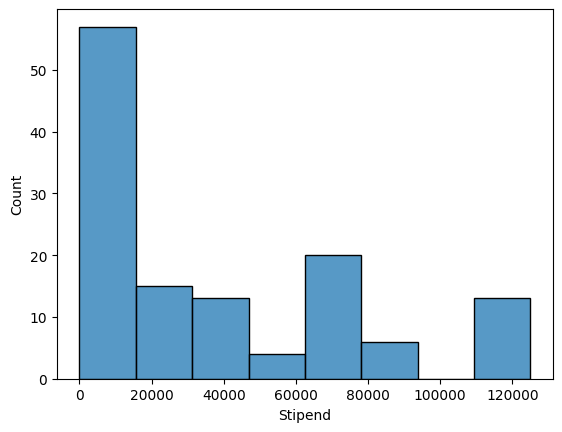

In [239]:
sns.histplot(data = df, x="Stipend")

In [250]:

px.histogram(df, x=CGPA, color="gender")

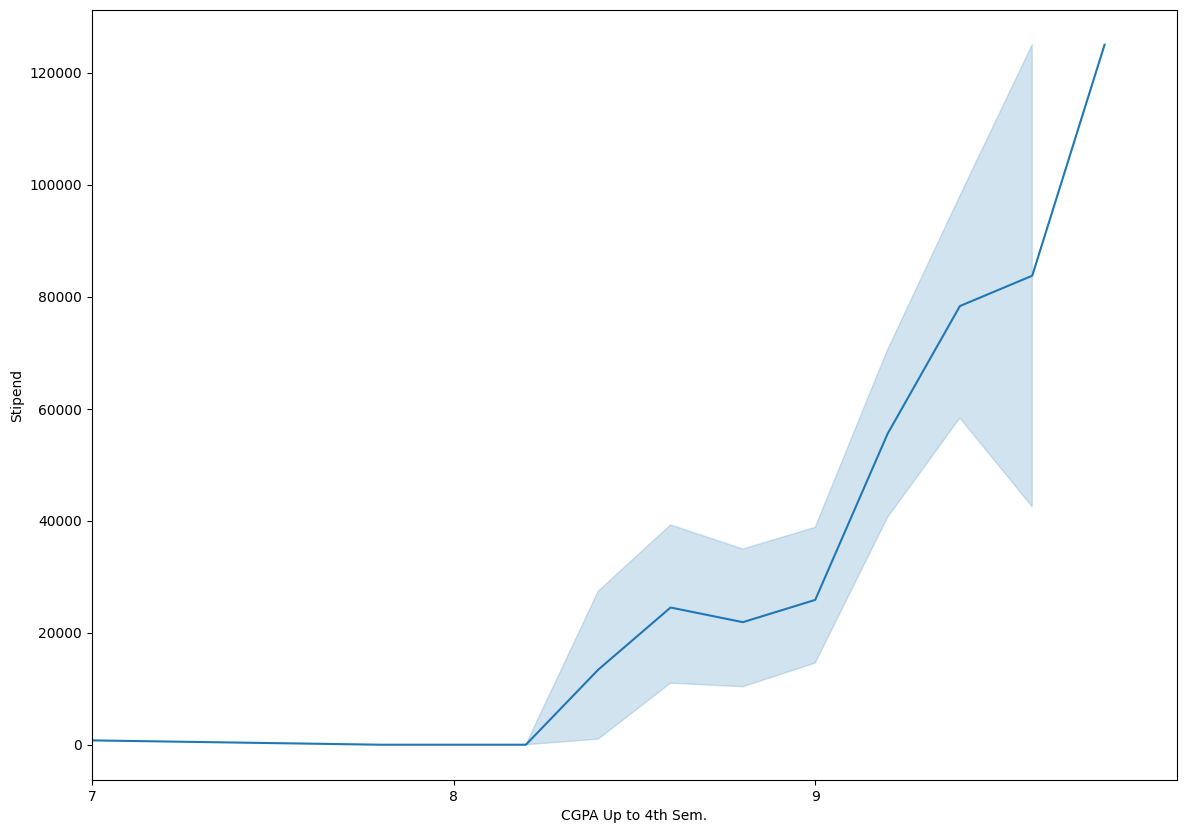

In [242]:
fig, ax = plt.subplots(figsize=(14,10))
ax.set_xlim(7,10)
ax.set_xticks(range(7,10))
fig = sns.lineplot(data=df, x=CGPA, y="Stipend", ax=ax)

<AxesSubplot:xlabel='CGPA Up to 4th Sem.', ylabel='Count'>

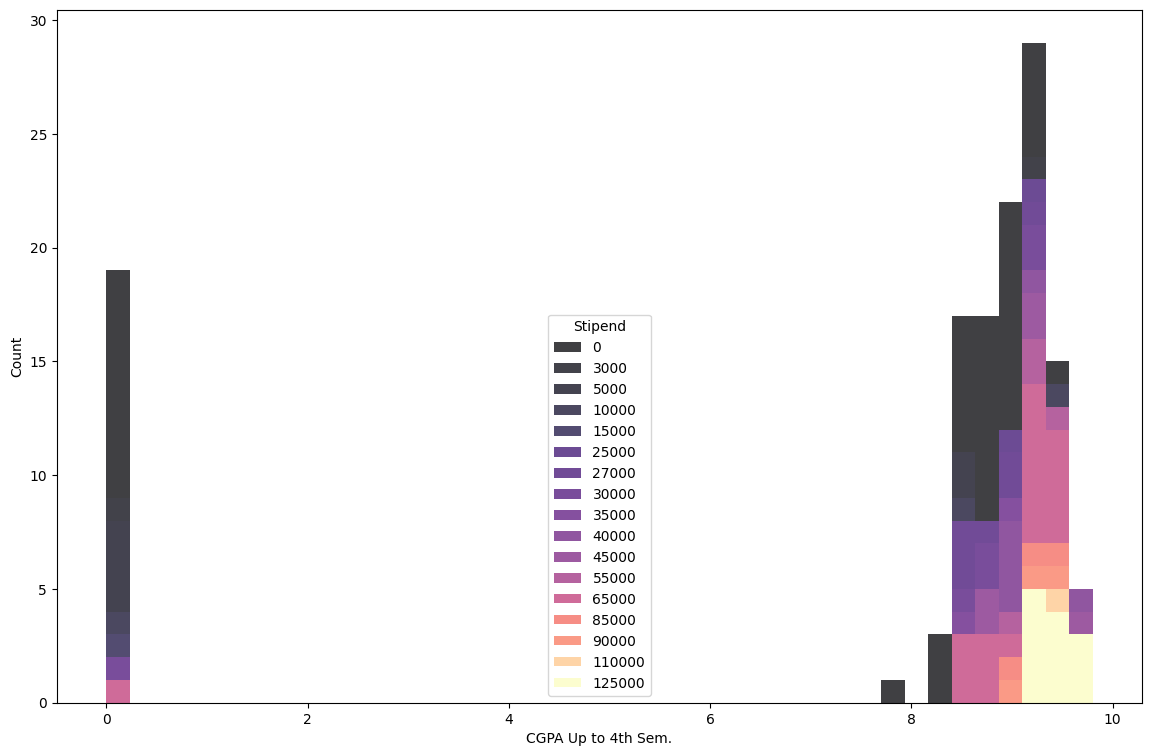

In [210]:
plt.figure(figsize=(14,9))
sns.histplot(data = df,x=CGPA, hue="Stipend", palette="magma", multiple="stack", linewidth=0)

In [211]:
px.scatter(df, x=SGPA4, y="Stipend", color="gender", opacity=0.3)

In [212]:
px.scatter(df, x=CGPA, y="Stipend", color="gender", opacity=0.3)

In [213]:
px.box(df, x="Mode", y="Stipend", color="gender")

In [214]:
px.box(df, x="Mode", color="gender", y=SGPA4)

<AxesSubplot:xlabel='sem', ylabel='Count'>

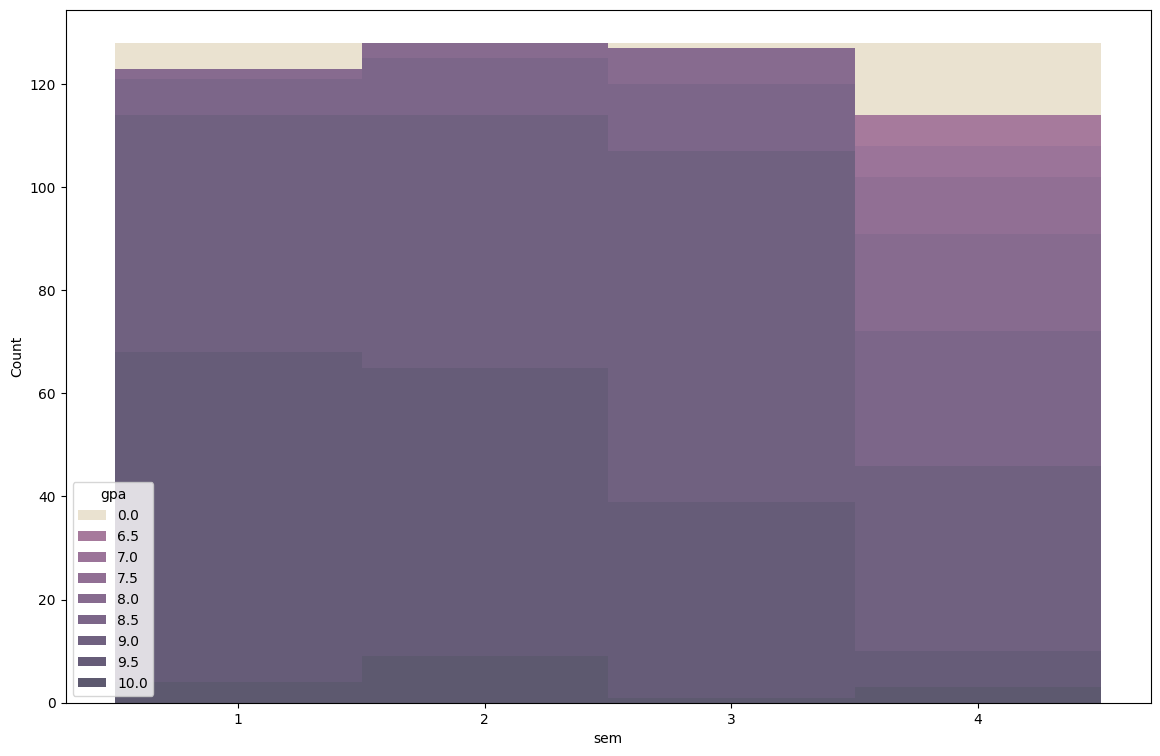

In [233]:
df1 = dfo.copy()
df1["gpa"] = df1["1st Sem. SGPA"]
df1["sem"] = "1";
df2 = dfo.copy()
df2["gpa"] = df2["2nd Sem. SGPA"]
df2["sem"] = "2";
df3 = dfo.copy()
df3["gpa"] = df3["3rd Sem. SGPA"]
df3["sem"] = "3";
df4 = dfo.copy()
df4["gpa"] = df4["4th Sem. SGPA"]
df4["sem"] = "4";
dfa = pd.concat([df1, df2, df3, df4])

def update_gpa(x): 
    if x == "RE" or x == "1R" or x == "5R":
        return 0
    else:
        return float(round(float(x) / 0.5) * 0.5)

dfa["gpa"] = dfa["gpa"].map(update_gpa)
plt.figure(figsize=(14,9))
sns.histplot(data = dfa, x="sem", hue="gpa", palette="ch:s=-.2,r=.6", multiple="stack", linewidth=0)
